<a href="https://colab.research.google.com/github/RojaCM/DEEP-LEARNING-/blob/main/basic_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

Natural Language Processing

1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing

2. stopwords – a collection of words that don’t provide any meaning to a sentence

3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors

2. GridSearchCV – for hyperparameter tuning

3. RandomForestClassifier – machine learning algorithm for classification

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Evaluation Metrics

1. Accuracy Score – no. of correctly classified instances/total no. of instances

2. Precision Score – the ratio of correctly predicted instances over total positive instances

3. Recall Score – the ratio of correctly predicted instances over total instances in that class

4. Roc Curve – a plot of true positive rate against false positive rate

5. Classification Report – report of precision, recall and f1 score

6. Confusion Matrix – a table used to describe the classification models

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [10]:
df_train=pd.read_csv('train.txt',delimiter=';',names=['text','label'])

In [11]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [12]:
df_train['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, we will merge these labels into two classes, i.e. Positive and Negative sentiment.

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

In [13]:
df_train1=df_train.copy()

In [14]:
#covert label categories into numerical labels
def customer_encoder(df):
  df.replace(to_replace='surprise',value=1,inplace=True)
  df.replace(to_replace='love',value=1,inplace=True)
  df.replace(to_replace='joy',value=1,inplace=True)
  df.replace(to_replace='anger',value=0,inplace=True)
  df.replace(to_replace='sadness',value=0,inplace=True)
  df.replace(to_replace='fear',value=0,inplace=True)

In [15]:
customer_encoder(df_train['label'])

In [16]:
df_train['label'].value_counts()

0    8762
1    7238
Name: label, dtype: int64

#DATA PREPROCESSING

1.Removal of punctual words using regular expressions
2.coverting into lowercase
3.removal of stopwords
4.Lemmatization


In [17]:
df_train

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,0


In [18]:
##object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [19]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def text_preprocessing(df):
  corpus_text=[]
  for text in df:
    new_text=re.sub('[^a-zA-Z]',' ',str(text))
    new_text=new_text.lower()
    new_text=new_text.split()
    new_text=[lm.lemmatize(word) for word in new_text if word not in set(stopwords.words('english'))]
    corpus_text.append(' '.join ( str(i) for i in new_text))

  return corpus_text

In [22]:
corpus=text_preprocessing(df_train['text'])

In [23]:
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

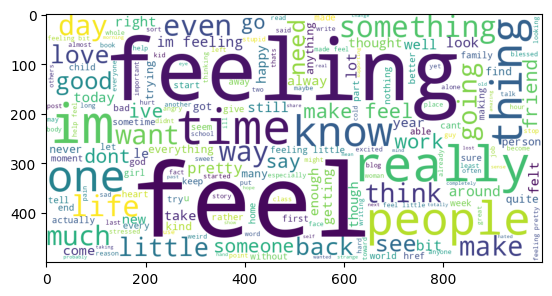

In [24]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

Bag of Words

In [25]:
#it describes the total occurrence of words within a document.

In [26]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df_train.label

In [27]:
X#

<16000x106705 sparse matrix of type '<class 'numpy.int64'>'
	with 277124 stored elements in Compressed Sparse Row format>

In [28]:
y

0        0
1        0
2        0
3        1
4        0
        ..
15995    0
15996    0
15997    1
15998    0
15999    0
Name: label, Length: 16000, dtype: int64

In [29]:
#will pass this as a parameter to GridSearchCV to train our random forest classifier model using all possible combinations of these parameters to find the best model.

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [30]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

KeyboardInterrupt: ignored

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

In [ ]:
Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = customer_encoder(y_test)
#pre-processing of text
test_corpus = text_preprocessing(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

#Model Evaluation

In [ ]:
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_preprocessing(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)